In [1]:
import numpy as np
import pandas as pd


C:\Users\Taylor Newman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Taylor Newman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Taylor Newman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#read data from csv
df = pd.read_csv('data_cleaned_2021.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [3]:
#display the number of rows and columns 
df.shape

(742, 42)

In [4]:
#display the unique job title values simplified 
df['job_title_sim'].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [5]:
#display the number of unique job title values simplified 
df['job_title_sim'].nunique()

10

In [6]:
#since there are fewer unique items in job_title_sim than 'Job Title' we will go with that column
#display the number of times each value in job_title_sim occurs
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [7]:
#print Job Location values
df['Job Location']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: Job Location, Length: 742, dtype: object

In [8]:
#print unique values
df['Job Location'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [9]:
#print number of unique values
df['Job Location'].nunique()

37

In [10]:
#print out the number of times each location appears 
df['Job Location'].value_counts().to_frame()

,Job Location
CA,152
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
NC,21
WA,21


In [11]:
#since there are only 37 values in Job Location but there are 50 states (plus Washington DC) create a list with values 
#of all states and make sure it is appropriate length
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
          'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS',
          'MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
          'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
print(len(states))

51


In [12]:
#this cell is mostly for our purposes so we are able to handle the state values that do not show up in the dataset. 
#create a list to hold locations that are missing 
missing_locations = []

#loop through states list and if item is not in Job Location title add to our missing_locations list 
for i in states:
  if str(i) not in[str(j)for j in df['Job Location']] :
    missing_locations.append(i)

missing_locations = pd.DataFrame(missing_locations, columns=['missing'])
#print missing_locations and the length 
print(missing_locations)
print(len(missing_locations))

   missing
0       AK
1       AR
2       HI
3       ME
4       MS
5       MT
6       NV
7       NH
8       ND
9       OK
10      SD
11      VT
12      WV
13      WY
14


In [13]:
#print Avg Salary(K) column 
df['Avg Salary(K)']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: Avg Salary(K), Length: 742, dtype: float64

In [14]:
#display number of unique values
df['Avg Salary(K)'].nunique()

219

In [15]:
#print unique values
df['Avg Salary(K)'].unique()

array([ 72. ,  87.5,  85. ,  76.5, 114.5,  95. ,  73.5, 114. ,  61. ,
       140. , 163.5, 139. ,  65.5, 113.5, 146. , 102. , 153.5, 142.5,
       105.5,  96. , 112.5,  84. , 143. ,  86.5,  99.5,  47.5, 121. ,
       106. , 107. , 110. , 147.5,  88. ,  98.5,  82.5, 130. , 155. ,
       184.5,  29.5,  81. ,  91. ,  68. , 115. , 109.5,  75.5, 154.5,
       143.5, 139.5,  67. , 118. ,  79.5,  56.5, 128.5,  97.5,  66.5,
       179.5,  76. , 112. ,  98. , 128. , 150.5, 124. ,  77.5,  87. ,
        53.5,  85.5,  48. , 174. , 106.5,  72.5,  99. , 133. , 237.5,
        95.5, 104.5,  55. ,  61.5, 157. ,  78. , 132.5, 108. ,  80.5,
       107.5, 119.5, 134. , 100.5, 122. ,  92.5,  62. ,  39.5,  40.5,
        89.5, 147. ,  81.5, 168. ,  97. , 100. , 105. , 103.5, 137.5,
        84.5, 164. , 169. , 142. , 171.5, 145. ,  42. , 120. ,  71.5,
        51.5, 151.5, 225. , 161.5, 124.5, 148. ,  59. , 146.5,  91.5,
       140.5,  70.5,  93.5, 134.5, 181. , 205. ,  48.5,  44.5,  52.5,
        64. ,  54. ,

In [16]:
#create a new df with values we will need. Since we will be asking user for skill input, we need all columns that address skills.
#we will start with these columns
df_salary_ = df

In [17]:
df_salary_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [18]:
df_salary_.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [19]:
#print our new dataframe 
df_salary_ = df_salary_.drop(['index','Job Title', 'Salary Estimate','Job Description', 'Rating','Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Revenue', 'Competitors', 'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary', 'company_txt', 'Age', 'seniority_by_title','Degree'], axis = 1)
df_salary_

,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,84.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,102.5,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,73.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,127.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [20]:
df_salary_['Sector'].value_counts()


Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
-1                                     10
Non-Profit                              9
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry            

In [21]:
df_salary_ = df_salary_[df_salary_.Sector != '-1']


In [22]:
df_salary_['Sector'].nunique()

24

In [23]:
df_salary_

,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,84.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,102.5,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,73.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,127.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [24]:
df_salary_ = df_salary_[df_salary_.job_title_sim != 'na']

In [25]:
#24 sectors and 37 job locations
df_salary_

,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,84.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,102.5,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,73.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,127.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [26]:
list(sorted(set(df_salary_['job_title_sim'])))

['Data scientist project manager',
 'analyst',
 'data analitics',
 'data engineer',
 'data modeler',
 'data scientist',
 'director',
 'machine learning engineer',
 'other scientist']

In [27]:
target = df_salary_['Avg Salary(K)']
target

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: Avg Salary(K), Length: 723, dtype: float64

In [28]:
data = df_salary_.drop(['Avg Salary(K)'], axis = 1)
data

,Sector,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [29]:
#since we may need the entire dataframe for other purposes throughout the app, print out original df to ensure it still includes all columns and values
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
clf = RandomForestRegressor(random_state=0)

In [32]:
enc_sector = LabelEncoder()

In [33]:
data['Sector']= enc_sector.fit_transform(data['Sector'])
data['Sector']

0       1
1      11
2       5
3      18
4       5
       ..
737     4
738    12
739     8
740     5
741    10
Name: Sector, Length: 723, dtype: int32

In [34]:
enc_location = LabelEncoder()

In [35]:
data['Job Location'] = enc_location.fit_transform(data['Job Location'])
data['Job Location']

0      24
1      17
2       7
3      35
4      25
       ..
737    16
738    31
739    28
740    28
741    26
Name: Job Location, Length: 723, dtype: int32

In [36]:
enc_title = LabelEncoder()

In [37]:
data['job_title_sim'] = enc_title.fit_transform(data['job_title_sim'])
data['job_title_sim']

0      5
1      5
2      5
3      5
4      5
      ..
737    8
738    3
739    8
740    5
741    8
Name: job_title_sim, Length: 723, dtype: int32

In [38]:
data

,Sector,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,1,24,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,5
1,11,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,5,7,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5
3,18,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,5,25,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,4,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
738,12,31,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,3
739,8,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8
740,5,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5


In [39]:
data.dtypes

Sector           int32
Job Location     int32
Python           int64
spark            int64
aws              int64
excel            int64
sql              int64
sas              int64
keras            int64
pytorch          int64
scikit           int64
tensor           int64
hadoop           int64
tableau          int64
bi               int64
flink            int64
mongo            int64
google_an        int64
job_title_sim    int32
dtype: object

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [41]:
X_test

,Sector,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
689,14,2,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,5
219,13,16,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,5
513,4,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
673,12,34,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5
93,12,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,5,20,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
43,14,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
701,20,31,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
73,12,34,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5


In [42]:
clf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [43]:
preds = clf.predict(X_test)

In [44]:
preds

array([132.8075    , 150.32      , 111.22288294,  94.395     ,
        96.38166667, 176.26125   , 137.81      , 117.35      ,
       101.05172619, 105.32      ,  97.76166667,  94.45247522,
       140.665     , 192.825     , 115.7225    ,  80.98      ,
        83.14      , 111.22288294, 100.201     , 135.85      ,
        60.397     , 130.09      , 107.83875   ,  90.66537031,
        61.835     ,  90.53466468,  76.55      , 150.77490385,
       100.245     ,  93.14416667,  84.47      ,  86.525     ,
        50.59      ,  70.595625  , 143.        , 238.23      ,
       145.495     , 109.46166667,  89.1       ,  97.69900577,
       101.428     ,  83.14      , 157.92      ,  74.69751515,
       105.525     ,  65.39      , 130.07583333, 104.85      ,
       124.06      ,  87.335     ,  84.47      ,  90.66537031,
       141.895     , 138.87274206,  53.325     ,  71.08649405,
       135.375     , 105.48      , 111.955     , 138.78961905,
       121.225     ,  77.515     , 121.225     ,  62.78

In [45]:
from sklearn.metrics import classification_report

In [46]:
clf.score(X_test, y_test)

0.4852724263523783

In [47]:
# test = pd.DataFrame({
#     'Sector' : ['Health Care'],
#     'Job Location' : ['MA'],
#     'Python' : [0],
#     'spark' : [0],
#     'aws' : [1], 
#     'excel' : [0],
#     'sql' : [0],
#     'sas' : [0],
#     'keras': [0],
#     'pytorch': [0],
#     'scikit' : [0],
#     'tensor' : [1],
#     'hadoop' : [0],
#     'tableau' : [0],
#     'bi' : [0],
#     'flink' : [0],
#     'mongo' : [0],
#     'google_an' : [0],
#     'job_title_sim' : ['other scientist']
# })

In [48]:
# test

In [49]:
# test_1 = pd.DataFrame({
#     'Sector' : ['Business'],
#     'Job Location' : ['FL'],
#     'Python' : [0],
#     'spark' : [0],
#     'aws' : [0], 
#     'excel' : [0],
#     'sql' : [1],
#     'sas' : [0],
#     'keras': [0],
#     'pytorch': [0],
#     'scikit' : [1],
#     'tensor' : [0],
#     'hadoop' : [0],
#     'tableau' : [0],
#     'bi' : [0],
#     'flink' : [0],
#     'mongo' : [1],
#     'google_an' : [0],
#     'job_title_sim' : ['analyst']
# })

In [50]:
import pickle

In [51]:
filename = 'finalized_model_clf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [52]:
pickle.dump(enc_sector, open('finalized_label_encoder_sector.sav', 'wb'))

In [53]:
pickle.dump(enc_location,open('finalized_label_encoder_location.sav', 'wb'))

In [54]:
pickle.dump(enc_title,open('finalized_label_encoder_title.sav','wb'))

In [55]:
X_test

,Sector,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
689,14,2,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,5
219,13,16,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,5
513,4,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
673,12,34,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5
93,12,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,5,20,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
43,14,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
701,20,31,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
73,12,34,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5


In [56]:
valid_states = []
for state in states:
    if state not in missing_locations:
        valid_states.append(state)
print(valid_states)

['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


In [57]:
list(sorted(set(df_salary_['Sector'])))

['Accounting & Legal',
 'Aerospace & Defense',
 'Agriculture & Forestry',
 'Arts, Entertainment & Recreation',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Construction, Repair & Maintenance',
 'Consumer Services',
 'Education',
 'Finance',
 'Government',
 'Health Care',
 'Information Technology',
 'Insurance',
 'Manufacturing',
 'Media',
 'Mining & Metals',
 'Non-Profit',
 'Oil, Gas, Energy & Utilities',
 'Real Estate',
 'Retail',
 'Telecommunications',
 'Transportation & Logistics',
 'Travel & Tourism']

In [58]:
skills = 'Python spark aws excel sql sas keras pytorch scikit tensor hadoop tableau bi flink mongo google_an'
skills.split(" ")

['Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an']

In [59]:
import altair as alt 

In [60]:
alt.__version__


'4.2.0'

In [61]:
df['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Staffing & Outsourcing', 'Wholesale',
       'Mining', 'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support 

In [62]:
df['Industry'].nunique()

60

In [63]:
df_industry = df['Industry'].value_counts()


In [64]:
df_industry

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
-1                                           10
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing           

<AxesSubplot:ylabel='Industry'>

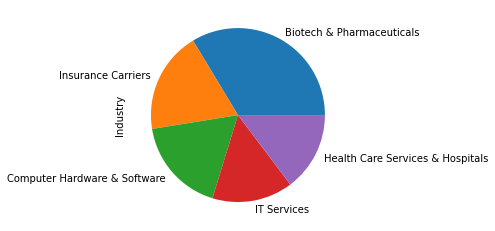

In [65]:
df_industry[0:5].plot(kind='pie')

In [66]:
top_5 = df_industry[0:5]
top_5

Biotech & Pharmaceuticals           112
Insurance Carriers                   63
Computer Hardware & Software         59
IT Services                          50
Health Care Services & Hospitals     49
Name: Industry, dtype: int64

In [ ]:
df_states = pd.DataFrame(df['Job Location'].value_counts())